# Using Spark Machine Learning to Recognize Handwritten Digits

This project uses the classic MNIST handwritten digit recognition dataset. It is from LeCun et al. (1998) and may be found under ["mnist" at the LibSVM dataset page](https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#mnist). 
  
Our datasets are vectors of pixels representing images of handwritten digits.  For example:

![Image of a digit](https://i.ibb.co/LZxDd0p/download.png)

- Our goal for our data is to learn how to recognize digits (0 - 9) from images of handwriting.

### Step 1: Explore data

1\. Use databrick filesystem commands `%fs ls` to explore the data at `/databricks-datasets/mnist-digits/data-001` on DBFS. 
 - list the files in the directory
 
In the following, we will use `mnist-digits-train.txt` to train our model, and `mnist-digits-test.txt` to test it.

In [ ]:
%fs ls /databricks-datasets/mnist-digits/data-001

path,name,size,modificationTime
dbfs:/databricks-datasets/mnist-digits/data-001/mnist-digits-test.txt,mnist-digits-test.txt,11671108,1454547135000
dbfs:/databricks-datasets/mnist-digits/data-001/mnist-digits-train.txt,mnist-digits-train.txt,69430283,1454547144000


2\. Exploring the data format

- display the first two rows of the data in the training dataset 
- Using either DBFS's head command or use spark RDD for this.

In [ ]:
%fs head /databricks-datasets/mnist-digits/data-001/mnist-digits-train.txt

[Truncated to first 65536 bytes]
5 153:3 154:18 155:18 156:18 157:126 158:136 159:175 160:26 161:166 162:255 163:247 164:127 177:30 178:36 179:94 180:154 181:170 182:253 183:253 184:253 185:253 186:253 187:225 188:172 189:253 190:242 191:195 192:64 204:49 205:238 206:253 207:253 208:253 209:253 210:253 211:253 212:253 213:253 214:251 215:93 216:82 217:82 218:56 219:39 232:18 233:219 234:253 235:253 236:253 237:253 238:253 239:198 240:182 241:247 242:241 261:80 262:156 263:107 264:253 265:253 266:205 267:11 269:43 270:154 290:14 291:1 292:154 293:253 294:90 320:139 321:253 322:190 323:2 348:11 349:190 350:253 351:70 377:35 378:241 379:225 380:160 381:108 382:1 406:81 407:240 408:253 409:253 410:119 411:25 435:45 436:186 437:253 438:253 439:150 440:27 464:16 465:93 466:252 467:253 468:187 494:249 495:253 496:249 497:64 519:46 520:130 521:183 522:253 523:253 524:207 525:2 545:39 546:148 547:229 548:253 549:253 550:253 551:250 552:182 571:24 572:114 573:221 574:253 575:253 576:253 577:253 578:201 579:78 597:23 598:66 599:213 600:253 601:253 602:253 603:253 604:198 605:81 606:2 623:18 624:171 625:219 626:253 627:253 628:253 629:253 630:195 631:80 632:9 649:55 650:172 651:226 652:253 653:253 654:253 655:253 656:244 657:133 658:11 677:136 678:253 679:253 680:253 681:212 682:135 683:132 684:16
0 128:51 129:159 130:253 131:159 132:50 155:48 156:238 157:252 158:252 159:252 160:237 182:54 183:227 184:253 185:252 186:239 187:233 188:252 189:57 190:6 208:10 209:60 210:224 211:252 212:253 213:252 214:202 215:84 216:252 217:253 218:122 236:163 237:252 238:252 239:252 240:253 241:252 242:252 243:96 244:189 245:253 246:167 263:51 264:238 265:253 266:253 267:190 268:114 269:253 270:228 271:47 272:79 273:255 274:168 290:48 291:238 292:252 293:252 294:179 295:12 296:75 297:121 298:21 301:253 302:243 303:50 317:38 318:165 319:253 320:233 321:208 322:84 329:253 330:252 331:165 344:7 345:178 346:252 347:240 348:71 349:19 350:28 357:253 358:252 359:195 372:57 373:252 374:252 375:63 385:253 386:252 387:195 400:198 401:253 402:190 413:255 414:253 415:196 427:76 428:246 429:252 430:112 441:253 442:252 443:148 455:85 456:252 457:230 458:25 467:7 468:135 469:253 470:186 471:12 483:85 484:252 485:223 494:7 495:131 496:252 497:225 498:71 511:85 512:252 513:145 521:48 522:165 523:252 524:173 539:86 540:253 541:225 548:114 549:238 550:253 551:162 567:85 568:252 569:249 570:146 571:48 572:29 573:85 574:178 575:225 576:253 577:223 578:167 579:56 595:85 596:252 597:252 598:252 599:229 600:215 601:252 602:252 603:252 604:196 605:130 623:28 624:199 625:252 626:252 627:253 628:252 629:252 630:233 631:145 652:25 653:128 654:252 655:253 656:252 657:141 658:37
4 161:67 162:232 163:39 173:62 174:81 189:120 190:180 191:39 201:126 202:163 216:2 217:153 218:210 219:40 229:220 230:163 244:27 245:254 246:162 257:222 258:163 272:183 273:254 274:125 284:46 285:245 286:163 300:198 301:254 302:56 312:120 313:254 314:163 327:23 328:231 329:254 330:29 340:159 341:254 342:120 355:163 356:254 357:216 358:16 368:159 369:254 370:67 380:14 381:86 382:178 383:248 384:254 385:91 396:159 397:254 398:85 402:47 403:49 404:116 405:144 406:150 407:241 408:243 409:234 410:179 411:241 412:252 413:40 424:150 425:253 426:237 427:207 428:207 429:207 430:253 431:254 432:250 433:240 434:198 435:143 436:91 437:28 438:5 439:233 440:250 453:119 454:177 455:177 456:177 457:177 458:177 459:98 460:56 466:102 467:254 468:220 494:169 495:254 496:137 522:169 523:254 524:57 550:169 551:254 552:57 578:169 579:255 580:94 606:169 607:254 608:96 634:169 635:254 636:153 662:169 663:255 664:153 690:96 691:254 692:153
1 159:124 160:253 161:255 162:63 186:96 187:244 188:251 189:253 190:62 214:127 215:251 216:251 217:253 218:62 241:68 242:236 243:251 244:211 245:31 246:8 268:60 269:228 270:251 271:251 272:94 296:155 297:253 298:253 299:189 323:20 324:253 325:251 326:235 327:66 350:32 351:205 352:253 353:251 354:126 378:104 379:251 380:253 381:184 382:15 405:80 406:240 407:251 408:193 409:23 432:32 433:253 434:253 435

In [ ]:
rdd = sc.textFile('/databricks-datasets/mnist-digits/data-001/mnist-digits-train.txt')
rdd.take(2)

Out[1]: ['5 153:3 154:18 155:18 156:18 157:126 158:136 159:175 160:26 161:166 162:255 163:247 164:127 177:30 178:36 179:94 180:154 181:170 182:253 183:253 184:253 185:253 186:253 187:225 188:172 189:253 190:242 191:195 192:64 204:49 205:238 206:253 207:253 208:253 209:253 210:253 211:253 212:253 213:253 214:251 215:93 216:82 217:82 218:56 219:39 232:18 233:219 234:253 235:253 236:253 237:253 238:253 239:198 240:182 241:247 242:241 261:80 262:156 263:107 264:253 265:253 266:205 267:11 269:43 270:154 290:14 291:1 292:154 293:253 294:90 320:139 321:253 322:190 323:2 348:11 349:190 350:253 351:70 377:35 378:241 379:225 380:160 381:108 382:1 406:81 407:240 408:253 409:253 410:119 411:25 435:45 436:186 437:253 438:253 439:150 440:27 464:16 465:93 466:252 467:253 468:187 494:249 495:253 496:249 497:64 519:46 520:130 521:183 522:253 523:253 524:207 525:2 545:39 546:148 547:229 548:253 549:253 550:253 551:250 552:182 571:24 572:114 573:221 574:253 575:253 576:253 577:253 578:201 579:78 597:23 5

### Step 2: Load the data

The data format is known as `libsvm` which is popular format in the Machine Learning community. Spark has a DataFrameReader for this format.

3\. First, loading the data into a Spark DataFrame. Then: 
- printing the schema of the dataframe
- displaying first 2 rows
- calaculating the number of rows.

In [ ]:
train = spark.read.format("libsvm").load('/databricks-datasets/mnist-digits/data-001/mnist-digits-train.txt').cache()

In [ ]:
train.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)



In [ ]:
train.limit(2).display()

label,features
5.0,"Map(vectorType -> sparse, length -> 780, indices -> List(152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 260, 261, 262, 263, 264, 265, 266, 268, 269, 289, 290, 291, 292, 293, 319, 320, 321, 322, 347, 348, 349, 350, 376, 377, 378, 379, 380, 381, 405, 406, 407, 408, 409, 410, 434, 435, 436, 437, 438, 439, 463, 464, 465, 466, 467, 493, 494, 495, 496, 518, 519, 520, 521, 522, 523, 524, 544, 545, 546, 547, 548, 549, 550, 551, 570, 571, 572, 573, 574, 575, 576, 577, 578, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 676, 677, 678, 679, 680, 681, 682, 683), values -> List(3.0, 18.0, 18.0, 18.0, 126.0, 136.0, 175.0, 26.0, 166.0, 255.0, 247.0, 127.0, 30.0, 36.0, 94.0, 154.0, 170.0, 253.0, 253.0, 253.0, 253.0, 253.0, 225.0, 172.0, 253.0, 242.0, 195.0, 64.0, 49.0, 238.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 251.0, 93.0, 82.0, 82.0, 56.0, 39.0, 18.0, 219.0, 253.0, 253.0, 253.0, 253.0, 253.0, 198.0, 182.0, 247.0, 241.0, 80.0, 156.0, 107.0, 253.0, 253.0, 205.0, 11.0, 43.0, 154.0, 14.0, 1.0, 154.0, 253.0, 90.0, 139.0, 253.0, 190.0, 2.0, 11.0, 190.0, 253.0, 70.0, 35.0, 241.0, 225.0, 160.0, 108.0, 1.0, 81.0, 240.0, 253.0, 253.0, 119.0, 25.0, 45.0, 186.0, 253.0, 253.0, 150.0, 27.0, 16.0, 93.0, 252.0, 253.0, 187.0, 249.0, 253.0, 249.0, 64.0, 46.0, 130.0, 183.0, 253.0, 253.0, 207.0, 2.0, 39.0, 148.0, 229.0, 253.0, 253.0, 253.0, 250.0, 182.0, 24.0, 114.0, 221.0, 253.0, 253.0, 253.0, 253.0, 201.0, 78.0, 23.0, 66.0, 213.0, 253.0, 253.0, 253.0, 253.0, 198.0, 81.0, 2.0, 18.0, 171.0, 219.0, 253.0, 253.0, 253.0, 253.0, 195.0, 80.0, 9.0, 55.0, 172.0, 226.0, 253.0, 253.0, 253.0, 253.0, 244.0, 133.0, 11.0, 136.0, 253.0, 253.0, 253.0, 212.0, 135.0, 132.0, 16.0))"
0.0,"Map(vectorType -> sparse, length -> 780, indices -> List(127, 128, 129, 130, 131, 154, 155, 156, 157, 158, 159, 181, 182, 183, 184, 185, 186, 187, 188, 189, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 289, 290, 291, 292, 293, 294, 295, 296, 297, 300, 301, 302, 316, 317, 318, 319, 320, 321, 328, 329, 330, 343, 344, 345, 346, 347, 348, 349, 356, 357, 358, 371, 372, 373, 374, 384, 385, 386, 399, 400, 401, 412, 413, 414, 426, 427, 428, 429, 440, 441, 442, 454, 455, 456, 457, 466, 467, 468, 469, 470, 482, 483, 484, 493, 494, 495, 496, 497, 510, 511, 512, 520, 521, 522, 523, 538, 539, 540, 547, 548, 549, 550, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 622, 623, 624, 625, 626, 627, 628, 629, 630, 651, 652, 653, 654, 655, 656, 657), values -> List(51.0, 159.0, 253.0, 159.0, 50.0, 48.0, 238.0, 252.0, 252.0, 252.0, 237.0, 54.0, 227.0, 253.0, 252.0, 239.0, 233.0, 252.0, 57.0, 6.0, 10.0, 60.0, 224.0, 252.0, 253.0, 252.0, 202.0, 84.0, 252.0, 253.0, 122.0, 163.0, 252.0, 252.0, 252.0, 253.0, 252.0, 252.0, 96.0, 189.0, 253.0, 167.0, 51.0, 238.0, 253.0, 253.0, 190.0, 114.0, 253.0, 228.0, 47.0, 79.0, 255.0, 168.0, 48.0, 238.0, 252.0, 252.0, 179.0, 12.0, 75.0, 121.0, 21.0, 253.0, 243.0, 50.0, 38.0, 165.0, 253.0, 233.0, 208.0, 84.0, 253.0, 252.0, 165.0, 7.0, 178.0, 252.0, 240.0, 71.0, 19.0, 28.0, 253.0, 252.0, 195.0, 57.0, 252.0, 252.0, 63.0, 253.0, 252.0, 195.0, 198.0, 253.0, 190.0, 255.0, 253.0, 196.0, 76.0, 246.0, 252.0, 112.0, 253.0, 252.0, 148.0, 85.0, 252.0, 230.0, 25.0, 7.0, 135.0, 253.0, 186.0, 12.0, 85.0, 252.0, 223.0, 7.0, 131.0, 252.0, 225.0, 71.0, 85.0, 252.0, 145.0, 48.0, 165.0, 252.0, 173.0, 86.0, 253.0, 225.0, 114.0, 238.0, 253.0, 162.0, 85.0, 252.0, 249.0, 146.0, 48.0, 29.0, 85.0, 178.0, 225.0, 253.0, 223.0, 167.0, 56.0, 85.0, 252.0, 2

#### Understanding the Data

The pixel intensities are represented in `features` as a sparse vector, for example the first observation, as seen above, has `label` as `5`, i.e. the hand-written image is for the number 5.  And this hand-written image is the following sparse vector (just click the triangle to the left of the feature in first row to see the following):

field | value
-- | --
VectorType| "sparse"
length| 780
indices| [152,153,155,...,682,683]
values| [3, 18, 18,18,126,...,132,16]

Here 
* `VectorType: sparse` says we have a sparse vector.
* `length: 780` says the vector has 780 indices in total . These indices from 0,...,779 are a unidimensional indexing of the two-dimensional array of pixels in the image.
* `indices: [152,153,155,...,682,683]` are the indices from the `[0,1,...,779]` possible indices with non-zero values 
  * a value is an integer encoding the gray-level at the pixel index
* `values: [3, 18, 18,18,126,...,132,16]` are the actual gray level values, for example:
  * at pixed index `152` the gray-level value is `3`, 
  * at index `153` the gray-level value is `18`,
  * ..., and finally at
  * at index `683` the gray-level value is `18`

4\. We have provided a function to display the images along with its label (or predicted label). 
- Using it to display the first four images in the training data set.

In [ ]:
%matplotlib inline
# the above allows the in-line display of images.

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import math

# a function to render images stored in the dataset.
def show_images(data):
  # Each image is supposed to be tuple.
  # the first element of the tuple is a 780 sparse vector, corresponding to features in the MNIST dataset.
  # the second element is an integer, corresponding to the label or predicted digit
  # in the following, we display the list of pictures in four-picture rows along with their labels.
  # don't show too many pictures with this function.

  # ussage: show_images([(r.features, r.label) for r in df.limit(4).collect()])
 
  fig = plt.figure()
  columns = 4
  rows = math.ceil(len(data)/4) # determine how many rows we need
  
  # ax stores the list of image plots.
  ax = []

  for i in range(len(data)):
      # the image is an array of 28x28 (=784) gray scale pixels. but the data is an 780 array. We need to pad it, 
      # convert it to float values, and reshape it to 28x28 matrices.
      img = np.array(np.pad(data[i][0],(0,784-len(data[i][0])),'constant',constant_values=(0,0)), dtype='float').reshape((28, 28))
      # create subplot and append to ax
      ax.append(fig.add_subplot(rows, 4, i+1) )
      ax[-1].set_title(str(int(data[i][1])))  # set title for the last image to its label.
      plt.imshow(img,cmap='gray') # render the image
      plt.axis('off') # turn off axies  


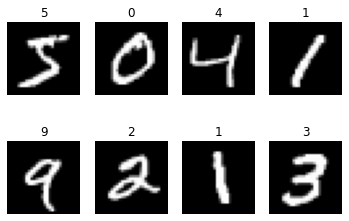

In [ ]:
show_images([ (r.features, r.label) for r in train.take(8)])

###  Step 3. Training a DecisionTreeClassifier

5\. Noting that the task is the a multi-class classification,
- In the following, building a simple decision tree classifier using the default parameters and the training dataset
- Then using the train model to recognize digits in the test dataset and report the "accuracy" metric.

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(labelCol='label',featuresCol="features")

In [ ]:
dt_model = dt.fit(train)

In [ ]:
test = spark.read.format("libsvm").load('/databricks-datasets/mnist-digits/data-001/mnist-digits-test.txt').cache()

In [ ]:
dt_results = dt_model.transform(test)

In [ ]:
dt_results.limit(5).display()

label,features,rawPrediction,probability,prediction
7.0,"Map(vectorType -> sparse, length -> 778, indices -> List(202, 203, 204, 205, 206, 207, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 326, 327, 328, 329, 353, 354, 355, 356, 381, 382, 383, 384, 408, 409, 410, 411, 436, 437, 438, 439, 463, 464, 465, 466, 491, 492, 493, 518, 519, 520, 521, 545, 546, 547, 548, 572, 573, 574, 575, 576, 600, 601, 602, 603, 627, 628, 629, 630, 631, 655, 656, 657, 658, 682, 683, 684, 685, 686, 710, 711, 712, 713, 714, 738, 739, 740, 741), values -> List(84.0, 185.0, 159.0, 151.0, 60.0, 36.0, 222.0, 254.0, 254.0, 254.0, 254.0, 241.0, 198.0, 198.0, 198.0, 198.0, 198.0, 198.0, 198.0, 198.0, 170.0, 52.0, 67.0, 114.0, 72.0, 114.0, 163.0, 227.0, 254.0, 225.0, 254.0, 254.0, 254.0, 250.0, 229.0, 254.0, 254.0, 140.0, 17.0, 66.0, 14.0, 67.0, 67.0, 67.0, 59.0, 21.0, 236.0, 254.0, 106.0, 83.0, 253.0, 209.0, 18.0, 22.0, 233.0, 255.0, 83.0, 129.0, 254.0, 238.0, 44.0, 59.0, 249.0, 254.0, 62.0, 133.0, 254.0, 187.0, 5.0, 9.0, 205.0, 248.0, 58.0, 126.0, 254.0, 182.0, 75.0, 251.0, 240.0, 57.0, 19.0, 221.0, 254.0, 166.0, 3.0, 203.0, 254.0, 219.0, 35.0, 38.0, 254.0, 254.0, 77.0, 31.0, 224.0, 254.0, 115.0, 1.0, 133.0, 254.0, 254.0, 52.0, 61.0, 242.0, 254.0, 254.0, 52.0, 121.0, 254.0, 254.0, 219.0, 40.0, 121.0, 254.0, 207.0, 18.0))","Map(vectorType -> dense, length -> 10, values -> List(131.0, 69.0, 317.0, 87.0, 13.0, 60.0, 19.0, 4644.0, 13.0, 62.0))","Map(vectorType -> dense, length -> 10, values -> List(0.024192059095106185, 0.012742382271468145, 0.05854108956602031, 0.016066481994459834, 0.0024007386888273315, 0.0110803324099723, 0.0035087719298245615, 0.8576177285318559, 0.0024007386888273315, 0.011449676823638042))",7.0
2.0,"Map(vectorType -> sparse, length -> 778, indices -> List(94, 95, 96, 97, 98, 99, 100, 121, 122, 123, 124, 125, 126, 127, 128, 129, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 203, 204, 205, 206, 210, 211, 212, 213, 232, 233, 238, 239, 240, 241, 265, 266, 267, 268, 269, 292, 293, 294, 295, 296, 320, 321, 322, 323, 347, 348, 349, 350, 351, 374, 375, 376, 377, 378, 402, 403, 404, 405, 429, 430, 431, 432, 433, 456, 457, 458, 459, 460, 484, 485, 486, 487, 488, 512, 513, 514, 515, 540, 541, 542, 543, 544, 545, 546, 547, 548, 550, 551, 552, 553, 554, 555, 556, 557, 558, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636), values -> List(116.0, 125.0, 171.0, 255.0, 255.0, 150.0, 93.0, 169.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 218.0, 30.0, 169.0, 253.0, 253.0, 253.0, 213.0, 142.0, 176.0, 253.0, 253.0, 122.0, 52.0, 250.0, 253.0, 210.0, 32.0, 12.0, 6.0, 206.0, 253.0, 140.0, 77.0, 251.0, 210.0, 25.0, 122.0, 248.0, 253.0, 65.0, 31.0, 18.0, 209.0, 253.0, 253.0, 65.0, 117.0, 247.0, 253.0, 198.0, 10.0, 76.0, 247.0, 253.0, 231.0, 63.0, 128.0, 253.0, 253.0, 144.0, 176.0, 246.0, 253.0, 159.0, 12.0, 25.0, 234.0, 253.0, 233.0, 35.0, 198.0, 253.0, 253.0, 141.0, 78.0, 248.0, 253.0, 189.0, 12.0, 19.0, 200.0, 253.0, 253.0, 141.0, 134.0, 253.0, 253.0, 173.0, 12.0, 248.0, 253.0, 253.0, 25.0, 248.0, 253.0, 253.0, 43.0, 20.0, 20.0, 20.0, 20.0, 5.0, 5.0, 20.0, 20.0, 37.0, 150.0, 150.0, 150.0, 147.0, 10.0, 248.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 168.0, 143.0, 166.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 123.0, 174.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 253.0, 249.0, 247.0, 247.0, 169.0, 117.0, 117.0, 57.0, 118.0, 123.0, 123.0, 123.0, 166.0, 253.0, 253.0, 253.0, 155.0, 123.0, 123.0, 41.0))","Map(vectorType -> dense, length -> 10, values -> List(23.0, 38.0, 191.0, 29.0, 10.0, 39.0, 201.0, 1.0,

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

e = MulticlassClassificationEvaluator(labelCol='label', metricName="accuracy")

In [ ]:
dt_accuracy = e.evaluate(dt_results)
dt_accuracy

Out[18]: 0.6751

### Step 4: Visualizing Results

6\. Because we are dealing with image classification, it is useful to visually check the good predictions and bad ones.

In the following, using the show_images function to 
- Display 8 correctly predicted images. The image labels should show predicted values.
- Display 8 incorrectly predicted images. The image labels should show predicted values.

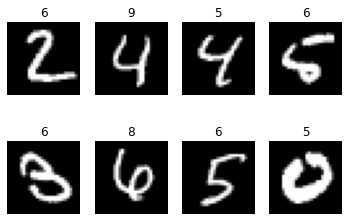

In [ ]:
from pyspark.sql.functions import col
dt_wrong = dt_results.filter(col('label')!=col("prediction")).take(8)
show_images([ (r.features, r.prediction) for r in dt_wrong])

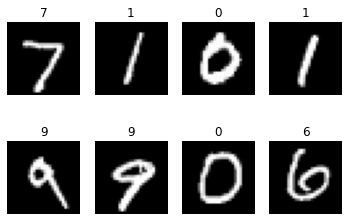

In [ ]:
dt_right = dt_results.filter(col('label')==col("prediction")).take(8)
show_images([ (r.features, r.prediction) for r in dt_right])

### Step 5: Model tunning

We next try to improve the decision tree model through hyper-parameter tunning.

7\. First, let's examine what parameters the decision tree model allows, using its `explainParams()` method.

In [ ]:
print(dt.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
featuresCol: features column name. (default: features, current: features)
impurity: Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini (default: gini)
labelCol: label column name. (default: label, current: label)
leafCol: Leaf indices column name. Predicted leaf index of each instance in each tree by preorder. (default: )
maxBins: Max number of bins for discreti

8\. One of the commonly manipulated model parameter is the decision tree's maxDepth. By increasing the tree maxDepth, we allow more complicated trees. 

To avoid accidental overfitting of the model, we use 3-fold cross validation to pick the best model. 

- Creating a cross validator `cv` that cross-validates the decision tree model with different maxDepth of 5 and 9, using three-fold cross validation.
- Training the cross-validator (this may take several minutes) and applying it on the test dataset. 
- How many models did it run?
- What is the accuracy of the best model?
- Which is the maxDepth of the best model?

In [ ]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

paramGrid = ParamGridBuilder().addGrid(dt.maxDepth,[5, 9]).build()

cv = CrossValidator(estimator=dt, evaluator=e, estimatorParamMaps=paramGrid)

In [ ]:
dt_cv_model = cv.fit(train)

In [ ]:
dt_cv_test_results = dt_cv_model.transform(test)
dt_cv_accuracy = e.evaluate(dt_cv_test_results)
dt_cv_accuracy

Out[27]: 0.851

In [ ]:
dt_cv_model.bestModel

Out[28]: DecisionTreeClassificationModel: uid=DecisionTreeClassifier_a7fe9347ad34, depth=9, numNodes=927, numClasses=10, numFeatures=780